# MNIST with CNN

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [2]:
# CNN 텐서 만들기
def build_CNN_classifier(x):
    # x로 들어오는 image shape = [55000, 784]
    # 위 x를 4차원 형태로 reshape -> stride, pooling의 shape인자와 동일
    '''
    [batch, height, width, channel]
    - batch:데이터 개수(몇 개가 들어올지 모르니 유연하게 -1로 설정
    - height, width : 이미지 가로,세로 길이
    - channel: 흑백이기 떄문에 1, 컬러라면 3 
    '''
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    # 1번째 컨볼루션 필터 W값
    '''<필터 shape설정만 독특하게 다름!>
    [height, width, 입력 channel, 출력 channel]
    - height, width: 이미지 가로, 세로 길이
    - 입력 channel: 흑백이기 떄문에 입력 channel인자 1임!(처음이니깐, conv2부터는 입력필터개수)
    - 출력 channel: 들어오는 이미지 1개에 대해 필터들을 적용하니까 필터개수 만큼 출력됨!
    '''
        # truncated_normal:일반 random_normal로 하면 -무한대와 +무한대에 근사한 값들도 포함되어 설정할 수 있으므로 그 경우에 학습시간이 오래걸림
        # 따라서 -무한대, +무한대 부분을 제외한(자른=truncated) truncated_normal 사용
    W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 32], stddev=5e-2))
    
    # 1번째에 적용된 필터들 거친 후 필터들 개수만큼 출력된 특징들에 각각 bias 연산하도록 bias할당
    # 여기서는 상수(constant)로 고정시켰지만 random값으로 설정해도 됨
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
    
    # 필터와 bias 적용 단계와 그 후 나온 특징들에 대해 활성함수 적용단계까지 한 번에!
    '''<strides shape 인자>
    [batch, height, width, channel]
    - batch: 데이터 개수(이미지 1개가 들어오니 1)
    - height, width: 가로,세로 1칸씩 띄워서 stride 적용
    - channel: 이미지 표현 RGB니깐 인자를 1로 추가(흑백)해 3차원으로 설정
    '''
        #padding='SAME'이면 입력 이미지 size와 필터링 걸친 후 나오는 특징 이미지 size와 같도록 하자!-가로,세로로 2차원이니까 conv2d사용
    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
    
    # pooling 적용
    '''<pooling shape인 kszie 인자>
    [batch, height, width, channel]
    - batch: 데이터 개수(이미지 1개가 들어오니 1)
    - height, width: pooling할 size를 가로, 세로 2로 설정
    - channel: 이미지 표현 RGB니까 1을 추가(흑백)해 3차원으로 설정
    @위에서 padding='SAME'으로 필터링 거친후 출력 size가 입력 size와 동일하니 [1, 28, 28, 1]이다. 
    따라서 pooling size(ksize)를 2 by 2로 설정했으니 size가 "28 -> 14"로 1/2만큼 줄어듦!
    '''
        # strides인자와 pooling 인자 의미는 위와 동일(stride사이즈 = pooing사이즈 맞게 해주는 것이 좋다)
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # 2번째 컨볼루션 필터 W값
    '''
    - 필터 shape의 인자 3번째가 32인 이유는 W_conv1에서 필터개수를 32개로 설정해 필터링 거친 후 특징들도 32개이기 때문에 입력 channel=32로 설정
    - 이제 2번째 컨볼루션에서 필터 개수를 64개로 설정해서 특징을 64개만큼 도출
    '''
    W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 32, 64], stddev=5e-2))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
    # h_pool1결과로 각 필터의 특징 size가 14 by 14인 상태인데, 여기서 pooling size를 2 by 2로 설정
    # 2번째 pooling을 거친 후 나온 이미지 특징 size는 7 by 7임.
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Fully Connected layer1 정의
    '''<Fully Conntected Wegiht값 size설정>
    [입력channel, 출력channel]
    - shape 첫 번째 인자: 2번의 pooling 모두 거친 후의 이미지 가로와 세로,
      그리고 64개의 필터들로 추출된 특징 64개를 곱해 모든 특징값들을 한 곳으로 모으기
    - shape 두 번째 인자: 1024개 만큼의 출력 size를 임의로 설정
    '''
    W_fc1 = tf.Variable(tf.truncated_normal(shape=[7*7*64, 1024], stddev=5e-2))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
    # 2번의 CNN을 거친 결과의 4차원 shape을 1차원으로 쫘악 펴주기- 데이터개수(행)는 가변적(-1)으로, 열(column)은 모든 특징값들 개수(W_fc1 행길이=h_pool2_flat 열길이)
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    # flatten해준 특징값들을 W_fc1과 곱한 후 summation, 그리고 bias값 더하기!
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    # 최종 분류 결과값을 도출할 Fully connected layer2 정의
    W_output = tf.Variable(tf.truncated_normal(shape=[1024, 10], stddev=5e-2))
    b_output = tf.Variable(tf.constant(0.1, shape=[10]))
    # flatten한 후 활성함수 적용한 값들에 최종 Weight, bias값 기반으로 활성함수 적용!
    logits = tf.matmul(h_fc1, W_output) + b_output
    # softmax 활성함수로 최종 10개의 클래스 중 한개로 분류
    y_pred = tf.nn.softmax(logits)
    
    return y_pred, logits

In [4]:
# Train, Test placeholder, cost function, accuracy 등 정의 

# x는 내장 데이터에서 제공하는 image shape=[550000, 784]이기 때문!
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

y_pred, logits = build_CNN_classifier(x)

# cost function : cross-entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,
                                                                logits=logits))
# Gradient Descent 사용해 cost 최소화
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

# 예측값에서 1(열)방향으로 값이 가장 큰 인자값(=정답숫자)
# & 실제값에서 1(열)방향으로 가장 큰 인자값(=정답숫자) 
# 일치하면 True(1), 불일치하면 False(0)반환
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))

# 정확도 정의(correct_prediction을 float형으로 만든 후 평균 계산!)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

# 위에서 만들었던 텐서들 Run 시키기
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # MNIST 데이터에서 batch_size 설정해 그것만큼 학습시키면서 cost 최소화 시켜라!
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            # 학습 시 정확도 일부 출력 - batch[0]:이미지feature들, batch[1]:정답(label)
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y:batch[1]})
            print(f"Epoch :{i}, Training Acc: {train_accuracy:4f}")
        # Gradient Descent로 Cost 최소화시키도록 학습
        sess.run([train_step], feed_dict={x:batch[0], y:batch[1]})
    
    # 마지막 학습한 최종 파라미터로 Test데이터로 평가 후 정확도 출력
    test_accuracy = accuracy.eval(feed_dict={x:mnist.test.images,
                                            y:mnist.test.labels})
    print(f"Test Acc: {test_accuracy:.4f}")

Epoch :0, Training Acc: 0.080000
Epoch :100, Training Acc: 0.760000
Epoch :200, Training Acc: 0.820000
Epoch :300, Training Acc: 0.980000
Epoch :400, Training Acc: 0.900000
Epoch :500, Training Acc: 1.000000
Epoch :600, Training Acc: 0.900000
Epoch :700, Training Acc: 0.960000
Epoch :800, Training Acc: 0.960000
Epoch :900, Training Acc: 0.940000
Test Acc: 0.9608


---

# CIFAR-10 with CNN

In [1]:
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data

def next_batch(num, data, labels):
    # 0부터 data길이-1 크기대로 data길이 만큼 요소를 담은 array만들기
    idx = np.arange(0, len(data))
    # 위에서 만든 idx 순서를 무작위로 섞음
    np.random.shuffle(idx)
    # 설정한 batch_size만큼의 index 재할당
    idx = idx[:num]
    # 위의 index 위치에 매핑되는 data 하나씩 담기(label도 마찬가지)
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    
    # asarray() 사용해 array로 만들고 리턴
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

In [4]:
# build CNN
import tensorflow as tf
def build_CNN_classfier(x):
    x_image = x
    # shape=[필터의height, 필터의width, 입력채널개수, 출력채널개수]
    # 입력채널개수=3 : conv1이기 때문에 최초의 이미지 데이터가 들어옴. 컬러 이미지기 때문에 3
    # conv2부터는 입력채널개수 = 입력필터개수가 됨!
    W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 64],
                                             stddev=5e-2))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[64]))
    # 입력 이미지와 필터를 strides사이즈와 padding 설정하고 컨볼루션한 후 bias를 더해 활성함수 relu적용
    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1,
                                     strides=[1, 1, 1, 1],
                                     padding='SAME') + b_conv1)
    # ksize의 batch_size 인자가 1인 것은 하나의 필터로 도출되어 나온 특징 feature 1개 당 pooling을 적용하기 때문
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 3, 3, 1],
                            strides=[1, 2, 2, 1], padding='SAME')
    # padding='SAME'이므로 필터적용할 사이즈 이전 입력 사이즈랑 동일!
    W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 64, 64],
                                             stddev=5e-2))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2,
                                     strides=[1, 1, 1, 1],
                                     padding='SAME') + b_conv2)
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 3, 3, 1],
                            strides=[1, 2, 2, 1], padding='SAME')
    # W의 shape에서 height, width는 필터의 height, width임!
    W_conv3 = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128],
                                             stddev=5e-2))
    b_conv3 = tf.Variable(tf.constant(0.1, shape=[128]))
    h_conv3 = tf.nn.relu(tf.nn.conv2d(h_pool2, W_conv3,
                                     strides=[1, 1, 1, 1],
                                     padding='SAME') + b_conv3)
    
    W_conv4 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128],
                                             stddev=5e-2))
    b_conv4 = tf.Variable(tf.constant(0.1, shape=[128]))
    h_conv4 = tf.nn.relu(tf.nn.conv2d(h_conv3, W_conv4,
                                     strides=[1, 1, 1, 1],
                                     padding='SAME'))
    
    W_conv5 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128],
                                             stddev=5e-2))
    b_conv5 = tf.Variable(tf.constant(0.1, shape=[128]))
    h_conv5 = tf.nn.relu(tf.nn.conv2d(h_conv4, W_conv5,
                                     strides=[1, 1, 1, 1],
                                     padding='SAME') + b_conv5)
    # Fully connected layer1
    # W_fc1의 shape 첫 번째 인자로 pooling거친 후 이미지 가로,세로 어떻게알지..?
    W_fc1 = tf.Variable(tf.truncated_normal(shape=[8*8*128, 384],
                                           stddev=5e-2))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[384]))
    
    # h_conv5를 W_fc1 행개수에 맞게 열벡터로 만들어주기
    h_conv5_flat = tf.reshape(h_conv5, [-1, 8*8*128])
    # 열벡터 만들어준 것을 W_fc1 weight와 곱하고 bias취해준 후 활성함수 적용
    h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)
    
    # Dropout으로 일부 노드 랜덤하게 드랍시키기 - *****Dropout은 최종 output출력 층 쌓기 전에 하기!!!*****
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # Fully connected layer2 - 최종 에측값 출력
    W_fc2 = tf.Variable(tf.truncated_normal(shape=[384,10],
                                           stddev=5e-2))
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
    logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    y_pred = tf.nn.softmax(logits)
    return y_pred, logits

In [ ]:
# 데이터 placeholder
# 이미지 가로 32, 세로 32, 마지막인자가 3인 이유는 컬러라서..? MNIST는 흑백이라 1..?
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

(x_train, y_train), (x_test, y_test) = load_data()
# label를 원-핫 인코딩 시키기- squeeze:차원 사이즈 중 1개 사이즈인 차원을 제거!!(axis=1로 '열'에 해당하는 제거할 차원 지정)
# tf.one_hot(1개 요소의array, depth) : 10개의 길이의 원-핫인코딩을 만드는데, array의 요소값에 대응되는 원-핫인코딩 만듦
# 예를 들어, array=[3] 이고 depth=4 이면 [0, 0, 1, 0] 이런식으로 만듦!
y_train_one_hot = tf.squeeze(tf.one_hot(y_train, 10), axis=1)
y_test_one_hot = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

y_pred, logits = build_CNN_classfier(x)

# cost function, **참고로 v2 = version.2임..!
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,
                                                                logits=logits))
# Gradient Descent 사용해 loss 최소화
train_step = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss)
# 예측값과 실제값 비교해서 맞으면 1 틀리면 0 반환
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
# 예측값=실제값 만족하는 '1' 평균 계산해 정확도 계산
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

# 만든 텐서 run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # batch_size=128개씩
        # 파이썬으로 정의한 함수 인자에 넣어주려면 만든 텐서를 값으로 넣어주어야하기 때문에 eval() 사용(y_train_one_hot은 텐서로 만들어주었기 때문)
        batch = next_batch(128, x_train, y_train_one_hot.eval())
        if i % 100 == 0:
            # 반복횟수가 100배수일때는 dropout하지 않고 모두 냅두기?
            train_accuracy = accuracy.eval(feed_dict={x: batch[0],
                                                     y: batch[1],
                                                     keep_prob:1.0})
            loss_print = loss.eval(feed_dict={x: batch[0],
                                             y: batch[1],
                                             keep_prob:1.0})
            print(f"Epoch:{i}, Train acc:{train_accuracy:.4f},\
            Loss:{loss_print:.4f}")
        # 위 100배수 조건 만족하지 않는 나머지 반복횟수때는 20% 노드 드랍아웃하기
        sess.run(train_step, feed_dict={x: batch[0], y: batch[1],
                                       keep_prob:0.8})
        
        # Test데이터도 batch_size 나누어서 평균 정확도 측정
    test_acc = 0.0
    for i in range(10):
        test_batch = next_batch(1000, x_test, y_test_one_hot.eval())
        test_acc = test_acc + accuracy.eval(feed_dict={x: test_batch[0],
                                                                y: test_batch[1],
                                                                keep_prob: 1.0})
    test_acc = test_acc / 10
    print(f"Test 평균 정확도: {test_acc:.4f}")
            

# 차원에 따른 Convolution 구현

## One-dimension
### using numpy

- numpy로 구현하는 것은 Cross-correlation이 아닌 진짜 ``Convolution`` 연산이용

In [24]:
import numpy as np

# 요소가 7개인 1차원 입력데이터
x = [1,0,2,3,0,1,1]
# 요소가 3개인 1차원 필터데이터
w = [2,1,3]
# padding 사이즈
p = 1 
# stride 사이즈
s = 1

# w 요소값 순서 뒤집기 = 필터 뒤집기
w_rot = np.array(w[::-1])
# padding시키기 전 입력 데이터
x_no_padded = np.array(x)
# padding이 1이상이면 설정한 padding사이즈 만큼의 (여기서는 1차원) zero padding 생성
if p > 0:
    # padding이 1이기 때문에 요소가 1개인 1차원 zero padding생성
    zero_pad = np.zeros(shape=p)
    # 양 옆에 zero padding 만들고 사이에 패딩 전 입력 데이터 넣어서 padding된 입력 데이터 새로 생성
    x_padded = np.concatenate([zero_pad, x_no_padded, zero_pad])

# 필터함수를 padding된 입력 데이터에 적용해서 특징 데이터 추출
res = []
# range범위에 output size 구하는 공식(o=[(n+2p-m)/s]+1)을 사용해서 구함. 그리고 output size길이만큼 반복문 수행
# floor=[] 연산은 int형으로 대체. 0부터 output_size-1까지니까 결국 1부터 output_size까지랑 동일
for i in range(0, int(len(x)+2*p-len(w)/s)+1):
    # 필터링하는 횟수*stride크기
    j = i*s
    # 필터사이즈만큼 입력데이터 값 요소 3개와 필터 값 요소 3개 각각 동일한 위치끼리 곱
    mapping_mul = x_padded[j:j+w_rot.shape[0]] * w_rot
    # 위에서 곱한 값을 sum해서 추출된 특징 데이터값(res)에다가 append!
    res.append(np.sum(mapping_mul))
    
print(np.array(res))

[ 1.  7.  8.  9. 11.  3.  4.]


- 위에서 한 실습 하나의 함수로 만들기

In [25]:
import numpy as np

def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_no_padded = np.array(x)
    
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_no_padded, zero_pad])
        
    res = []
    for i in range(0, int(len(x)+2*p-len(w))+1):
        j = s*i
        mapping_mul = x_padded[j:j+w_rot.shape[0]] * w_rot
        res.append(np.sum(mapping_mul))
    return np.array(res)

# 요소가 7개인 1차원 입력데이터
x = [1,0,2,3,0,1,1]
# 요소가 3개인 1차원 필터데이터
w = [2,1,3]

result = conv1d(x, w, p=1, s=1)
print(result)

[ 1.  7.  8.  9. 11.  3.  4.]


### using Tensorflow 1.x
- 텐서플로우는 Convolution이 아닌 ``Cross-Correlation``으로 구현되어 있음

In [56]:
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

i = tf.constant([1,0,2,3,0,1,1], dtype=tf.float32, name='i')
k = tf.constant([2,1,3], dtype=tf.float32, name='k')

# 입력데이터를 3차원으로, 마지막(인자)차원(가장안쪽)은 1개, 이전 차원은 input_size만큼, 가장바깥쪽 차원은 1개로 고정시키고 행렬만들기
data = tf.reshape(i, [1, int(i.shape[0]),1], name='data')
# 필터도 3차원으로, 마지막(인자)차원, 이전차원은 1개, 가장 바깥쪽 차원은 kernel_size만큼 고정시키고 행렬만들기
kernel = tf.reshape(k, [int(k.shape[0]), 1, 1], name='kernel')
kernel2 = tf.reshape(k, [1, int(k.shape[0]), 1], name='kernel')

# 1 = strides 사이즈
# padding='VALID' : padding = 0 !
res = tf.nn.conv1d(data, kernel, 1, 'VALID')
tf.Session().run(res)

array([[[ 8.],
        [11.],
        [ 7.],
        [ 9.],
        [ 4.]]], dtype=float32)

In [60]:
print("## data:\n",tf.Session().run(data),'\n')
print("## [int(k.shape[0]), 1, 1]일 때:\n", tf.Session().run(kernel),'\n')
print("## [1, int(k.shape[0]), 1]일 때:\n", tf.Session().run(kernel2))

## data:
 [[[1.]
  [0.]
  [2.]
  [3.]
  [0.]
  [1.]
  [1.]]] 

## [int(k.shape[0]), 1, 1]일 때:
 [[[2.]]

 [[1.]]

 [[3.]]] 

## [1, int(k.shape[0]), 1]일 때:
 [[[2.]
  [1.]
  [3.]]]


In [ ]:
## 이유알아야함

## Two-dimension
### using numpy

- scipy.signal의 convolve2d 함수와 numpy로만 구현한 결과 비교

In [2]:
import numpy as np

# 입력 데이터 shape=[4,4]
x = [[1,3,2,4],[5,6,1,3],[1,2,0,2],[3,4,3,2]]
# 필터 shape=[3,3]
w = [[1,0,3],[1,2,1],[0,1,1]]
# 2차원 padding size를 튜플로 정의
p = (1,1)
# 2차원 stride size를 튜플로 정의
s = (1,1)

# Real로 컨볼루션을 구현하니까 필터 뒤집기
w_rot = np.array(w[::-1])
x_no_padded = np.array(x)
# 패딩시킨 입력데이터 가로,세로 크기 정의
n1 = x_no_padded.shape[0] + 2*p[0]
n2 = x_no_padded.shape[1] + 2*p[1]
# 패딩시킨 입력데이터 크기의 array를 0으로 우선 채워넣어서 만들어놓기
x_padded = np.zeros(shape=(n1,n2))
# 패딩시킨 부분 제외한 가운데에다가 원본 입력 데이터 집어넣기
x_padded[p[0]:p[0]+x_no_padded.shape[0], p[1]:p[1]+x_no_padded.shape[0]] = x_no_padded

# 필터로 추출된 특징 데이터 담을 빈리스트 할당
res = []

#### 2차원이기 때문에 가로, 세로 별로 반복문을 2번써야 함
#먼저 가로.. range범위:필터가 shift하는 횟수임!
# *****공식: floor( (입력shape가로-필터shape가로)/stride가로 ) + 1******
for i in range(0, int((x_padded.shape[0] - w_rot.shape[0]/s[0])) + 1):
    # 세로 데이터 넣을 빈리스트 append
    res.append([])
    for j in range(0, int((x_padded.shape[1] - w_rot.shape[1])/s[1]) +1):
        # i(가로)고정시키고 j(세로) 모든 반복돌고 다음 i 고정시키고 j  모든 반복...해서 모든 부분 필터 적용
        # 필터 사이즈가 직각일 것을 대비해 필터 shape인자 잘 작성해주어야 함!
        x_sub = x_padded[i*s[0]:i*s[0]+w_rot.shape[0], j*s[1]:j*s[1]+w_rot.shape[1]]
        # res[-1]: 2d array 상태에서 -1로 해주면 가장 안쪽 차원으로 값이 들어감
        # res[-2]: 3d array 상태에서 -2로 해주면 가장 안쪽 차원으로 값이 들어감(-1은 가운데 차원으로!)
        res[-1].append(np.sum(x_sub * w_rot))
res

[[23.0, 17.0, 26.0, 11.0],
 [26.0, 24.0, 25.0, 11.0],
 [27.0, 24.0, 18.0, 10.0],
 [13.0, 16.0, 14.0, 9.0]]

### using Tensorflow 1.x

In [96]:
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

i = tf.constant([[1,3,2,4],[5,6,1,3],[1,2,0,2],[3,4,3,2]], dtype=tf.float32, name='i')
k = tf.constant([[1,0,3],[1,2,1],[0,1,1]], dtype=tf.float32, name='k')

tf.Session().run(i)
# 어떻게 구현..?
# 3D-conv는 Numpy로 어떻게!?

array([[1., 3., 2., 4.],
       [5., 6., 1., 3.],
       [1., 2., 0., 2.],
       [3., 4., 3., 2.]], dtype=float32)

## Change a color of jpg

In [98]:
import matplotlib.pyplot as plt
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

### 흑백 이미지

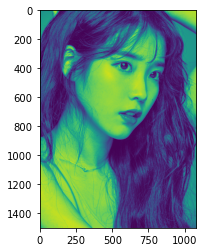

In [149]:
# plt.imread 하면 이미지의 픽셀값이 얻어짐
image = plt.imread('black_iu.jpg')

# 2차원에서 100행, 100열의 pixel값 가져오기
px = image[100,100]

# 흑백이미지 이기 때문에 에러발생
# blue = image[100,100,0]
# print(blue)

image2 = image.copy()
image2[0:1500, 0:1078] = 0

plt.figure()
plt.imshow(image)
# 흑백 이미지는 파랑,초록색 계열로 출력됨

In [150]:
image2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### 컬러 이미지

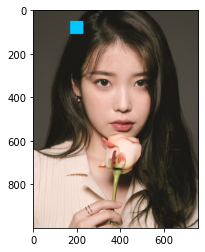

In [132]:
# plt.imread 하면 이미지의 픽셀값이 얻어짐
image = plt.imread('color_iu.jpg')

# 2차원에서 100행, 100열의 pixel값 가져오기
px = image[100,100]

blue = image[100,100,0]

image2 = image.copy()
image2[50:110, 170:230] = [0, 200, 255]

plt.figure()
plt.imshow(image2)

In [134]:
image2[1, 1]

array([64, 60, 51], dtype=uint8)